# Fetal Health Detection

### Introduction

Child mortality reduction is an important indication of human development and is reflected in several of the United Nations' Sustainable Development Goals. By 2030, the United Nations wants nations to have eliminated avoidable deaths of newborns and children under the age of five, with all countries aiming to decrease under-five mortality to at least 25 per 1,000 live births. Maternal mortality, which accounts for 295 000 fatalities during and after pregnancy and delivery, runs parallel to the concept of child mortality (as of 2017). The great majority of these deaths (94%) happened in low-resource areas, and the majority of them could have been avoided.

Cardiotocograms (CTGs) are a straightforward and inexpensive way for healthcare practitioners to monitor fetal health and take measures to reduce child and mother death. The machine sends ultrasound pulses and reads the response, providing information on the fetal heart rate (FHR), fetal movements, so on.

### Goal

My main aim in this project is to use machine learning to classify and predict fetal health which in turn can prevent fetal and maternal mortality. We intend to use classification algorithms to achieve the lowest error in prediction.

### Data

The dataset chosen for this project has features extracted from Cardiotocogram exams, and classified by expert obstetricians.

Source: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318

Link to Dataset: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification


### Implementation

#### Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns         #Upgrade seaborn to 11.0, to get histplot at end of the file

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.cm import get_cmap
import numpy as np
from matplotlib.colors import rgb2hex
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

### Data Preparation & Pre-Proccessing

The dataset contains 22 columns and 2126 records.

In [4]:
import pandas as pd
df = pd.read_csv('dataset/fetal_health.csv')

In [5]:
print(f"Shape of input dataframe is: {df.shape}")
df.head()

Shape of input dataframe is: (2126, 22)


baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [6]:
df.tail()

baseline value  accelerations  fetal_movement  uterine_contractions  \
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
2121                  0.0                   0.0                       0.0   
2122                  0.0                   0.0                       0.0   
2123                  0.0                   0.0                       0.0   
2124                  0.0                   0.0                       0.0   
2125                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
2121          137.0          177.0                        4.0   
2122          103.0          169.0                        6.0   
2123          103.0          170.0                        5.0   
2124          103.0          169.0                        6.0   
2125          117.0          159.0                        2.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
2121                         0.0           153.0           150.0   
2122                         0.0           152.0           148.0   
2123                         0.0           153.0           148.0   
2124                         0.0           152.0           147.0   
2125                         1.0           145.0           143.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
2121             152.0                 2.0                 0.0           2.0  
2122             151.0                 3.0                 1.0           2.0  
2123             152.0                 4.0                 1.0           2.0  
2124             151.0                 4.0                 1.0           2.0  
2125             145.0                 1.0                 0.0           1.0  

[5 rows x 22 columns]

In [7]:
print(f"Dataset Columns:\n{df.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [10]:
# List of continous features
df.select_dtypes(exclude=['object']).columns.tolist()

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health']

In [11]:
df.select_dtypes(include=["category"])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2126 rows x 0 columns]

No categorical features present


In [12]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [13]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Exploratory Data Analysis

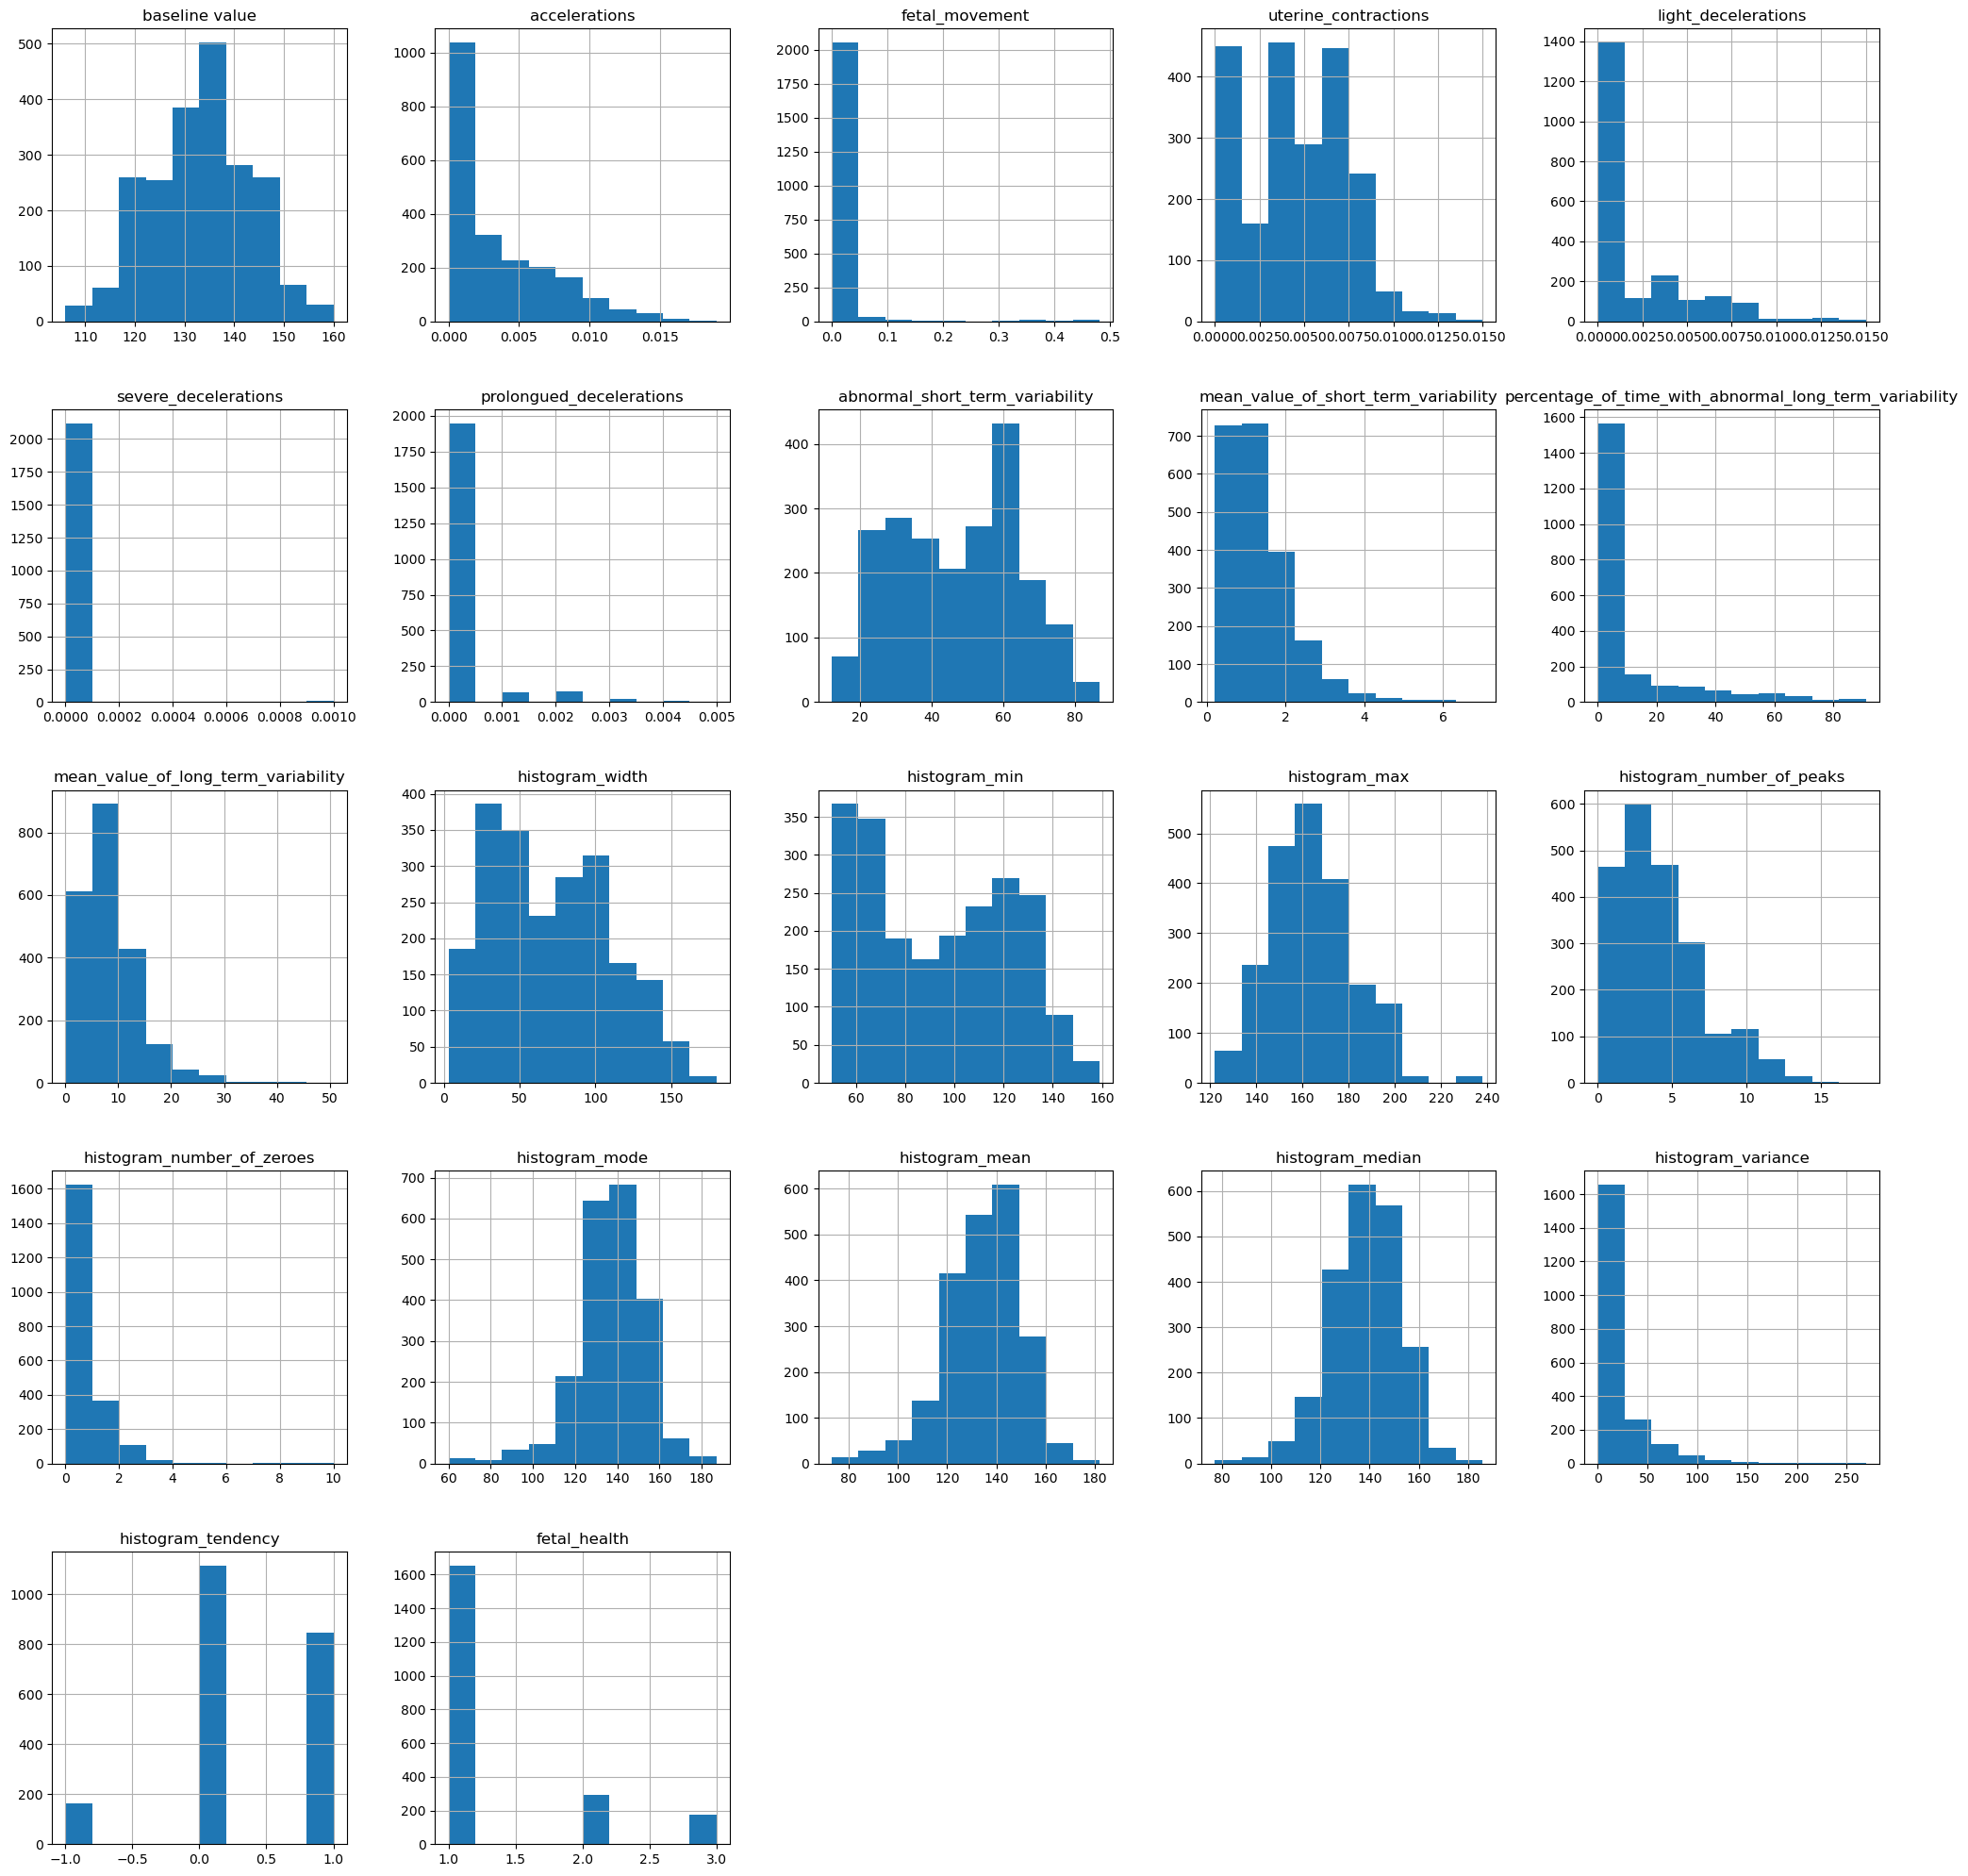

In [14]:
data_hist_plot = df.hist(figsize = (25,25))

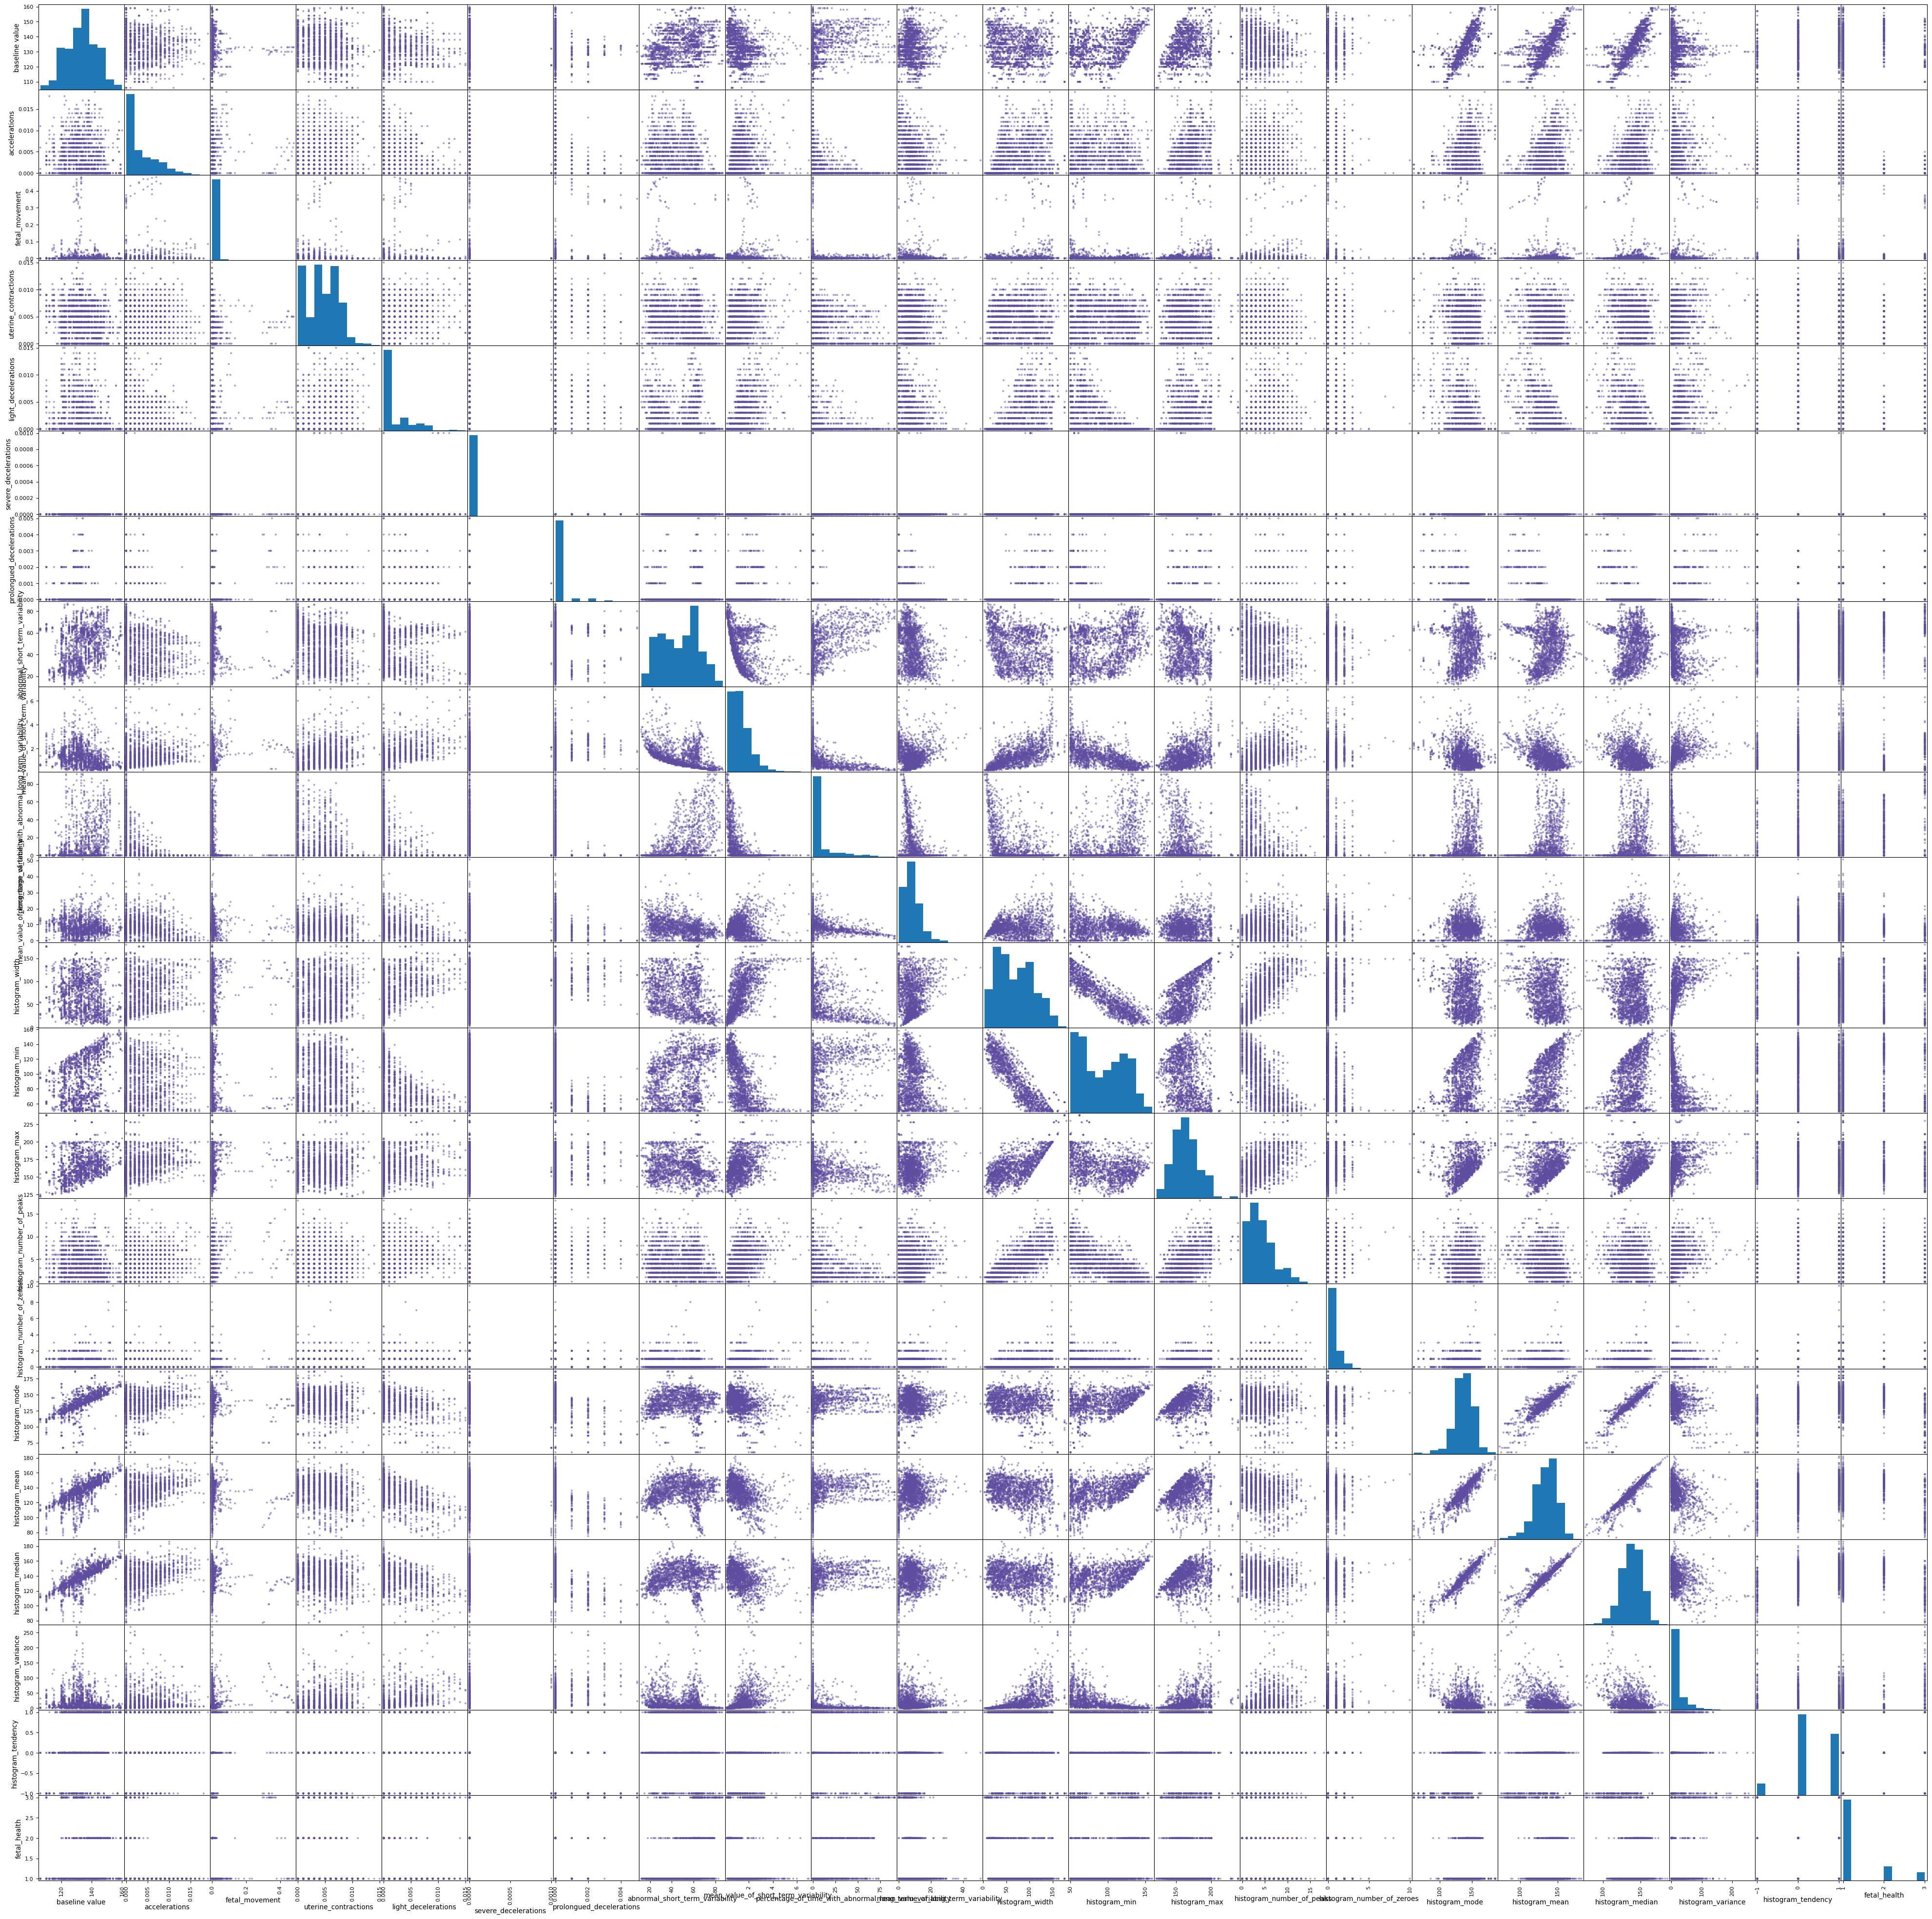

In [15]:
from pandas.plotting import scatter_matrix
scatterMatrix = scatter_matrix(df,figsize=(50, 50), color = "#5F4EA0")

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


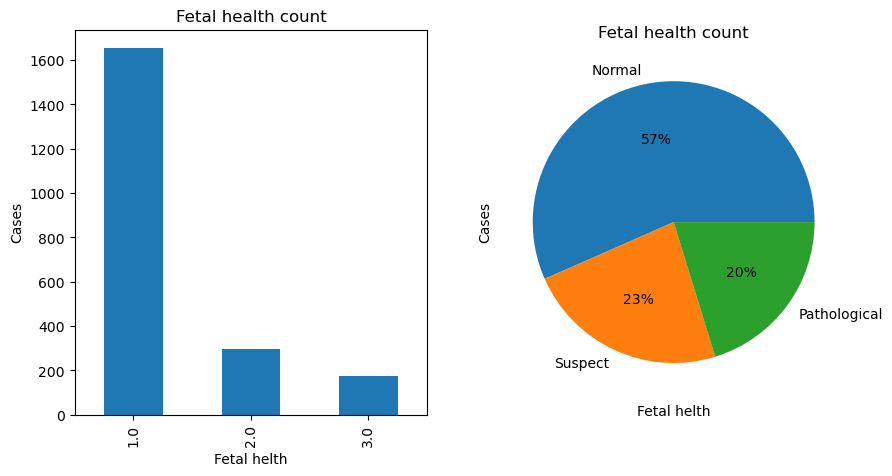

In [16]:
total = df["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(df["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = df.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")

plt.show()

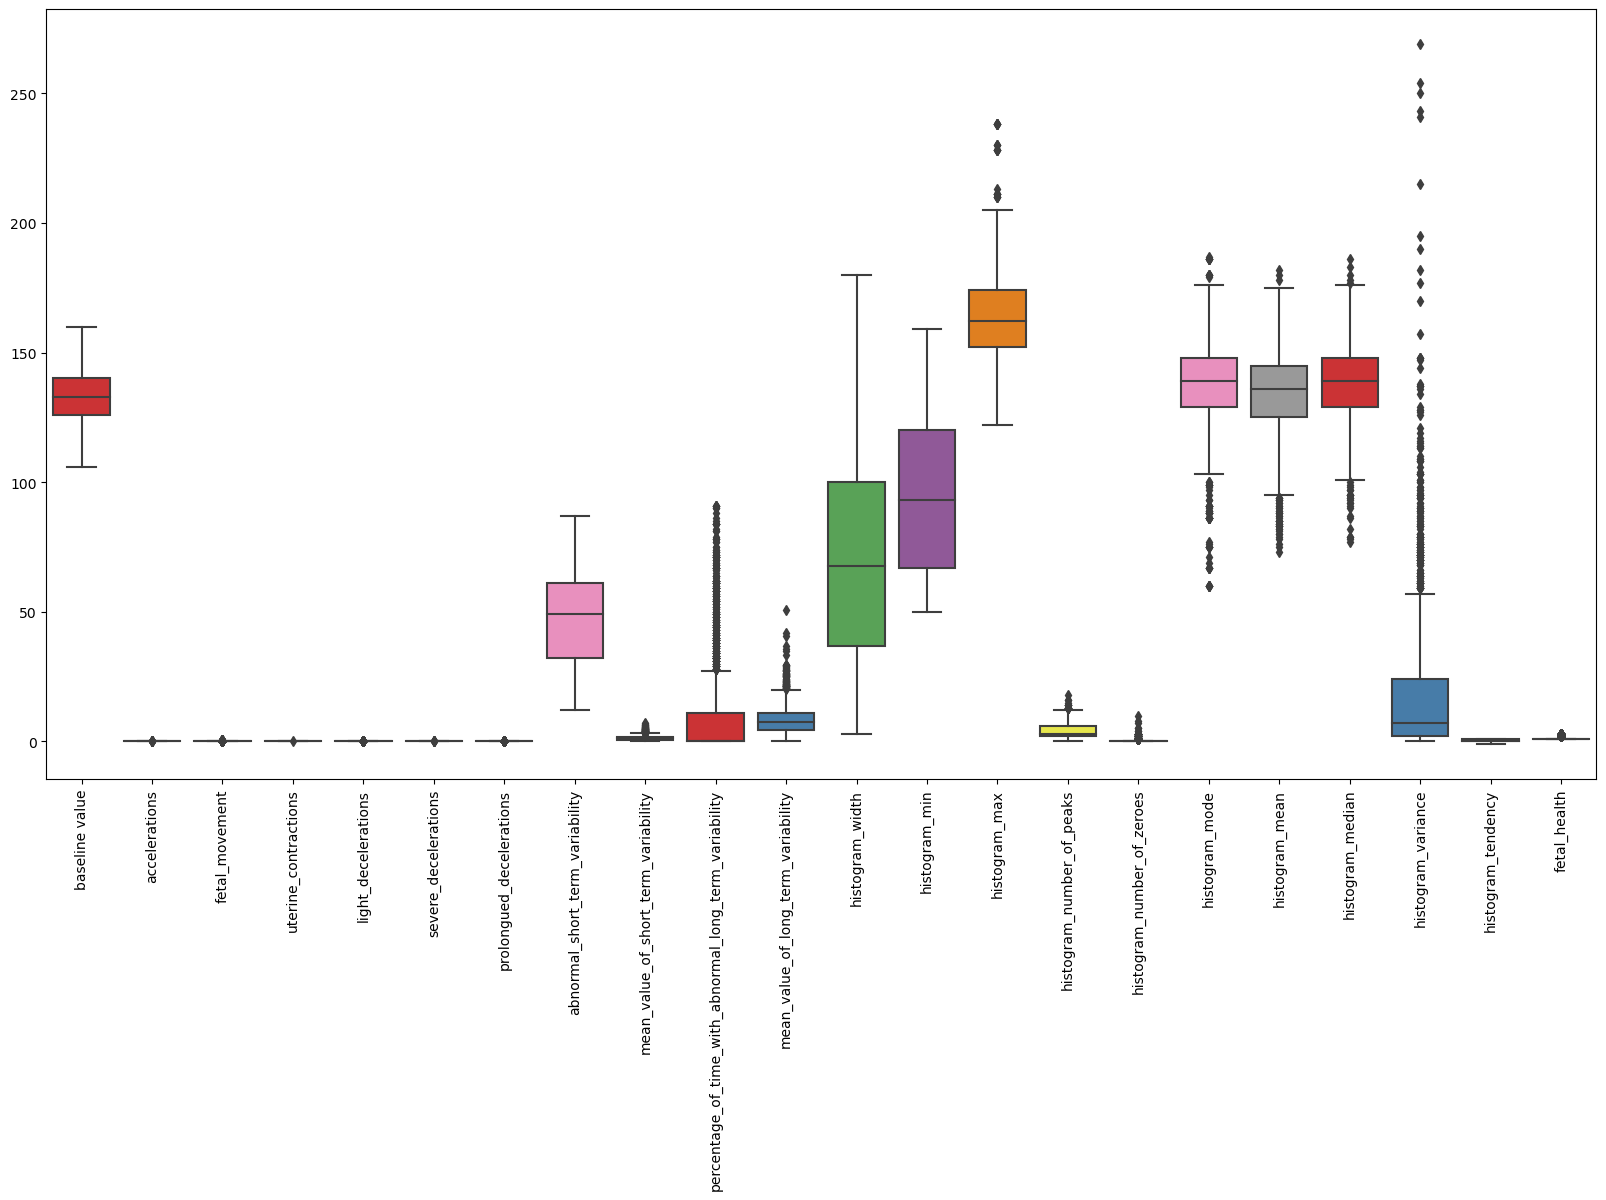

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

#### Outlier Removal

In [18]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()
    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' -----------------------------------------------------------------------\n')
    
    df = df1.copy()

    return df

In [19]:
df = removeOutlier(df.histogram_variance, df)
df = removeOutlier(df.histogram_median, df)
df = removeOutlier(df.histogram_mean, df)
df = removeOutlier(df.histogram_mode, df)
df = removeOutlier(df.percentage_of_time_with_abnormal_long_term_variability, df)
df = removeOutlier(df.mean_value_of_short_term_variability, df)

lowerbound:  -68.12481771467543  -------- upperbound:  105.74099833555971
44  number of outliers from  2126
 -----------------------------------------------------------------------

lowerbound:  96.21293175778905  -------- upperbound:  180.71886459187473
17  number of outliers from  2082
 -----------------------------------------------------------------------

lowerbound:  92.08366378331934  -------- upperbound:  178.71246212467096
17  number of outliers from  2065
 -----------------------------------------------------------------------

lowerbound:  97.08081110895039  -------- upperbound:  180.2912592035496
17  number of outliers from  2048
 -----------------------------------------------------------------------

lowerbound:  -45.780257839676395  -------- upperbound:  66.39473346744597
57  number of outliers from  2031
 -----------------------------------------------------------------------

lowerbound:  -1.1711686306789308  -------- upperbound:  3.781908245673865
30  number of outlie

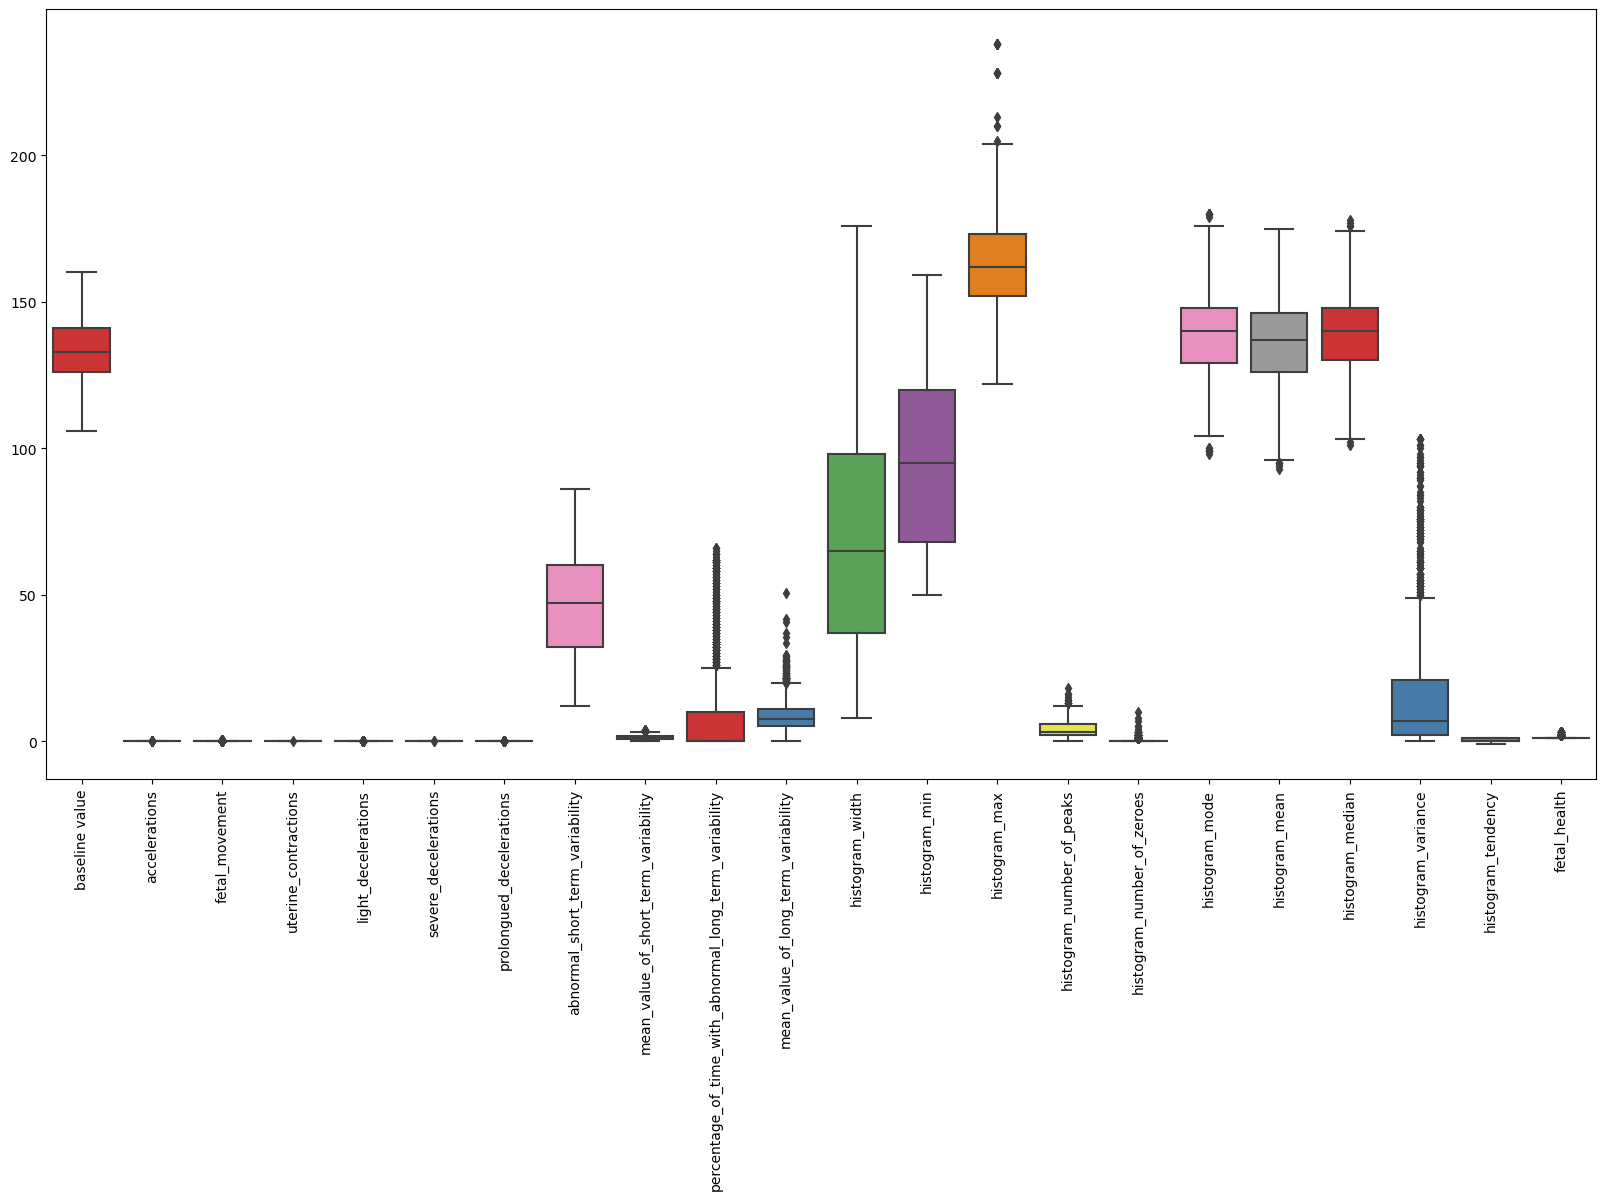

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

#### Feature Selection

##### Correlation Matrix

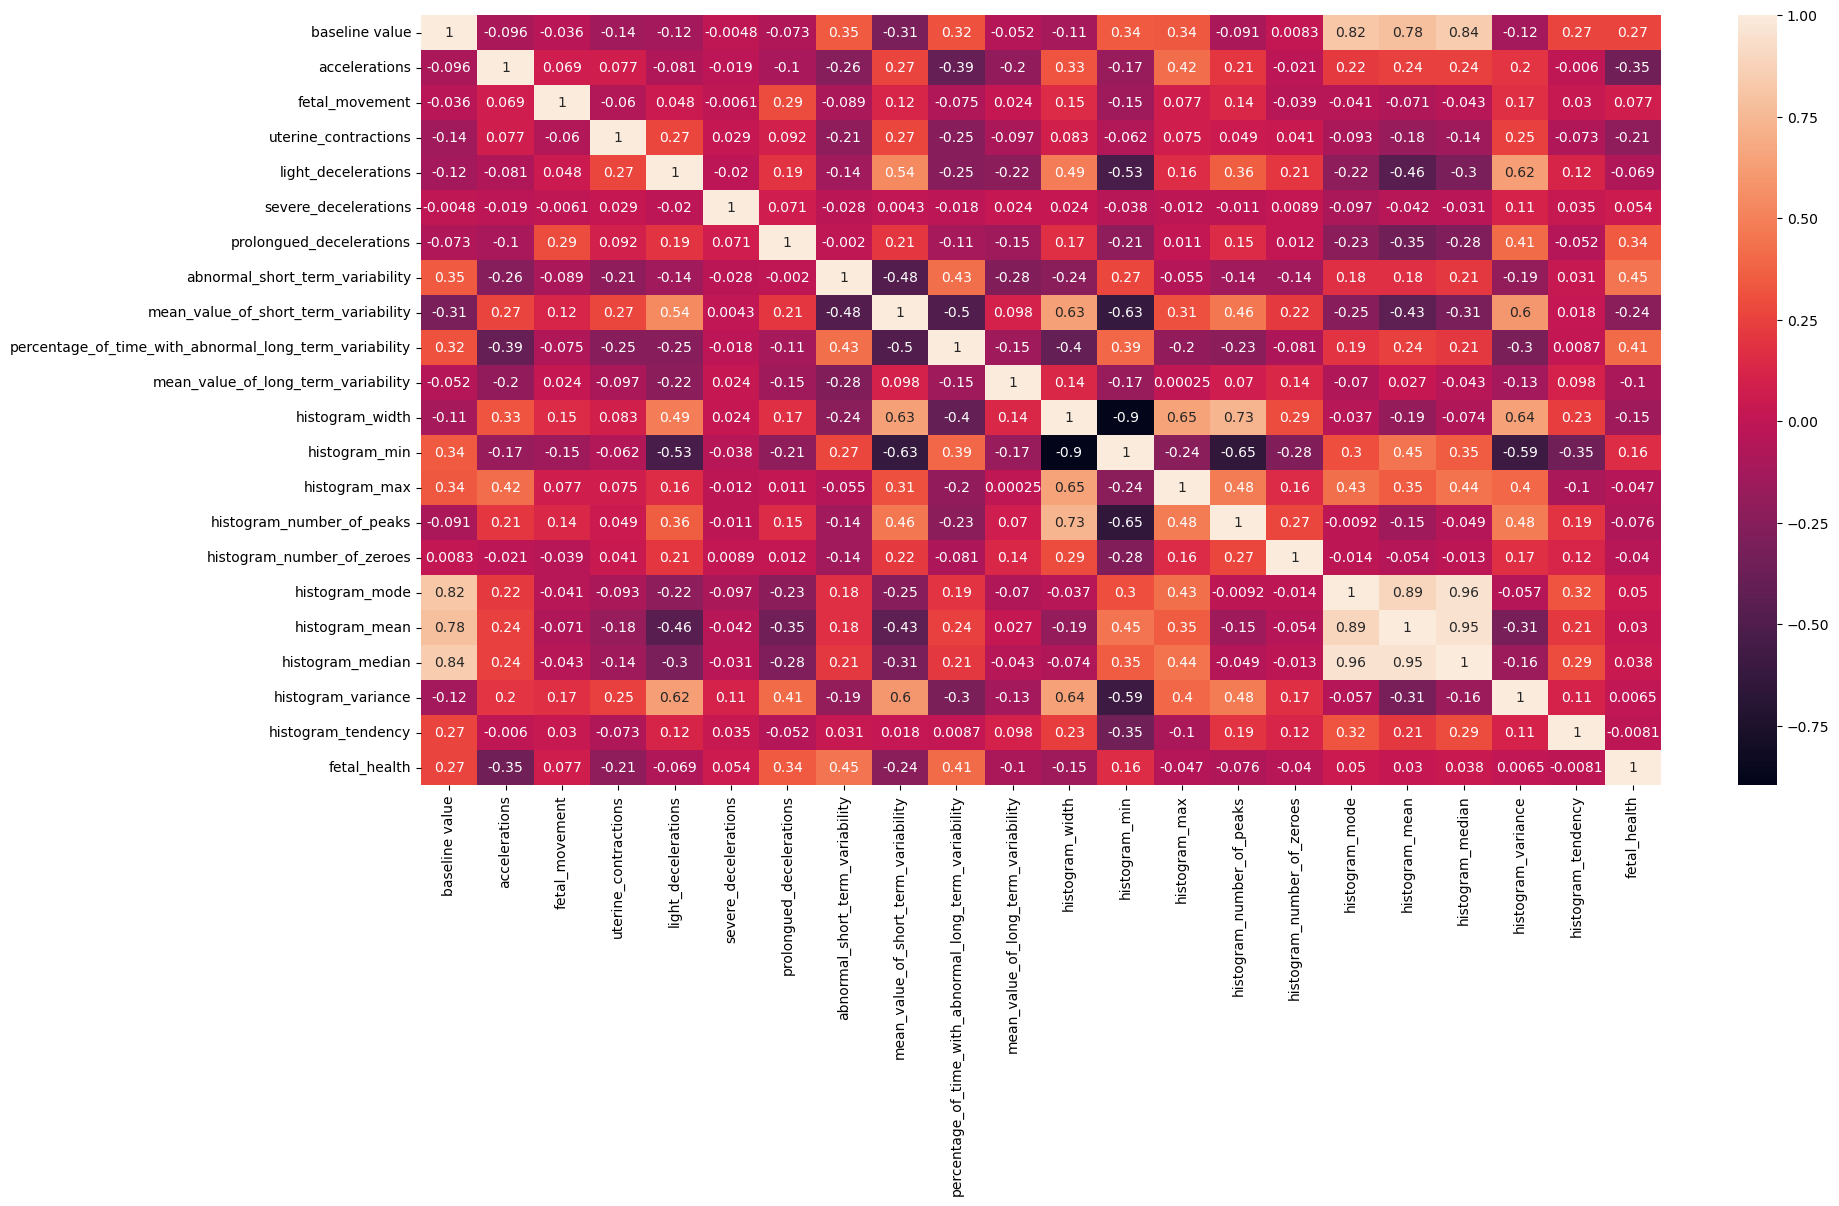

In [21]:
plt.figure(figsize=(20, 10))
p=sns.heatmap(df.corr(), annot=True)

##### Mean Absolute Error (MAD)

In [22]:
#Splitting the dataset
X = df.drop(['fetal_health'], axis = 1)
Y = df['fetal_health']

<BarContainer object of 21 artists>

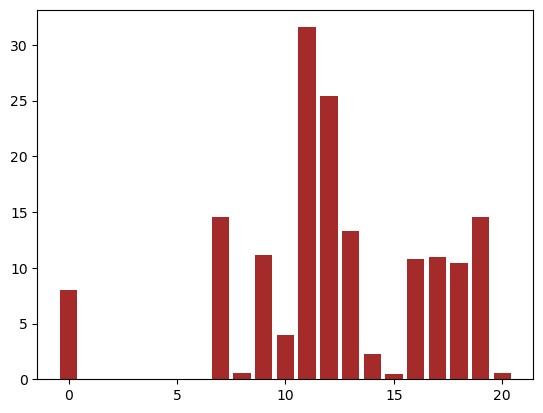

In [23]:
mean_abs_diff = np.sum(np.abs(X - np.mean(X, axis = 0)), axis = 0)/X.shape[0]
plt.bar(np.arange(X.shape[1]), mean_abs_diff, color = 'brown')

#### How Features with higher correlation affect each class

c:\Users\HP\miniconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


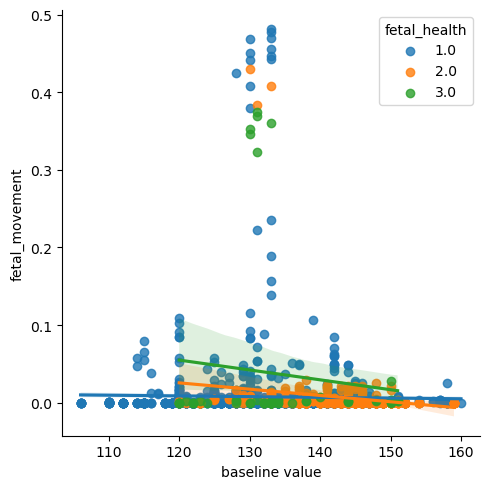

In [24]:
sns.lmplot(data =df,x="baseline value",y="fetal_movement", hue="fetal_health", legend_out=False)
plt.show()

c:\Users\HP\miniconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


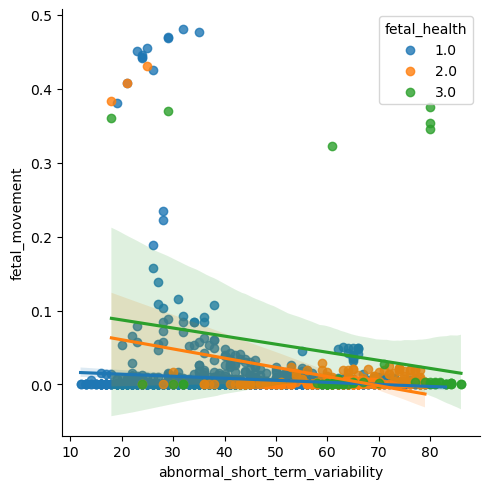

In [25]:
sns.lmplot(data =df,x="abnormal_short_term_variability",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

c:\Users\HP\miniconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


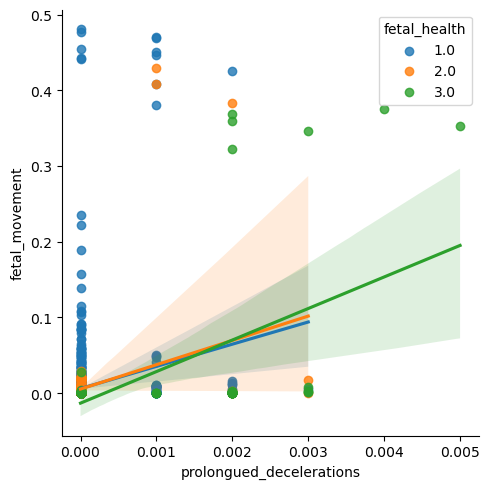

In [26]:
sns.lmplot(data =df,x="prolongued_decelerations",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

c:\Users\HP\miniconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


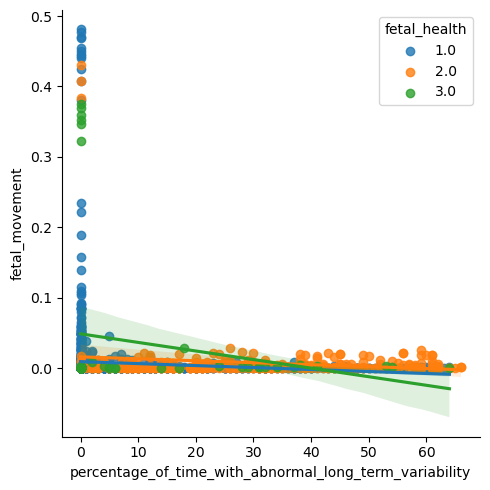

In [27]:
sns.lmplot(data =df,x="percentage_of_time_with_abnormal_long_term_variability",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

c:\Users\HP\miniconda3\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


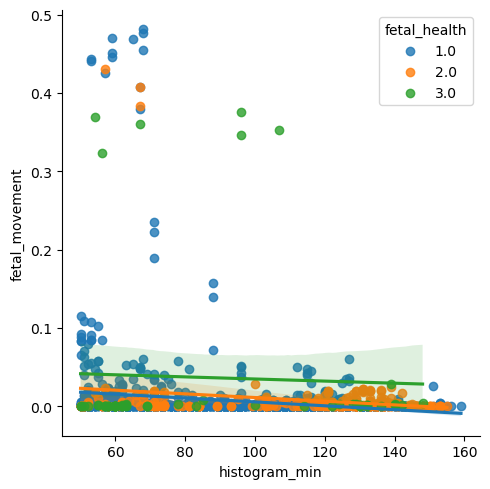

In [28]:
sns.lmplot(data =df,x="histogram_min",y="fetal_movement", hue="fetal_health",legend_out=False)
plt.show()

### Observations

1. From the pathological records, the features of fetal movements, uterine conttractions, and the interval range of heart rate values strongly correlated with deceleration rates in higher proportionals.

2. Among the suspect and normal records, the plots representing the increased accelerations but not deceleration. Therefore, both pathological and suspect records achieving more decelerations.

3. Pathological records have higher values of percentage of time with long term variability and abnormal short term variability.

4. Pathological records have lower metrics for mode, median, and mean for cardiotocography exams among their graph tendencies, while normal records have higher values for these metrics. This correlates with their cardiotocography graphs.

5. There were a lot of outliers, therofore we decided to remove the outliers as they represent a measure of error.

6. No categorical features, all are numerical.

8. From EDA, we have come to the conclusion that all the numerical features will be our predictors to predict "fetal_health".

### Algorithms intended to apply

Our next steps are to prepare and pass the data into the models that we want to predict.

Our goal is to build classification task for predicting the child mortality and maternity mortality

####  Logistic regression, K-nearest neighbors (KNN) and Random Forest

1. Logistic Regression: LR is the standard state-of-the-art architecture for interpreting the labeled outputs of mortality. 

2. K-nearest neighbours(KNN): Since the class splits have been separable based on distance for many attributes.

Main advantages of KNN and Logistic regression are robust use in similarity function for estimating the predictor value irrespective of dataset size and simplicity.

3. Random Forest Classifier: While pre-processing the data, the main observation in the data is the limitation of classes - where the pre-dominant group will be given features stack of values. And well-known for ease in generalization.

### Modelling

#### Splitting the data

In [29]:
cols = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

scale_X = StandardScaler()
X = pd.DataFrame(scale_X.fit_transform(df.drop(["fetal_health"],axis = 1)), columns = cols)
Y = df["fetal_health"]

In [30]:
X.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0       -1.372401      -0.853940       -0.191364             -1.516891   
1       -0.149226       0.692219       -0.191364              0.550533   
2       -0.047295      -0.080860       -0.191364              1.239674   
3        0.054636      -0.080860       -0.191364              1.239674   
4       -0.149226       0.949912       -0.191364              1.239674   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0             -0.62168             -0.032092                 -0.222038   
1              0.48471             -0.032092                 -0.222038   
2              0.48471             -0.032092                 -0.222038   
3              0.48471             -0.032092                 -0.222038   
4             -0.62168             -0.032092                 -0.222038   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                         1.595378                             -1.060868   
1                        -1.740886                              1.191042   
2                        -1.800462                              1.191042   
3                        -1.800462                              1.613276   
4                        -1.800462                              1.613276   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                           2.265913       ...   
1                                          -0.560755       ...   
2                                          -0.560755       ...   
3                                          -0.560755       ...   
4                                          -0.560755       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0        -0.128787      -1.135318      -2.218698                  -0.683540   
1         1.670220      -0.926737       2.054508                   0.715199   
2         1.670220      -0.926737       2.054508                   0.365514   
3         1.315870      -1.448188       0.392706                   2.463622   
4         1.315870      -1.448188       0.392706                   1.764253   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                   -0.441064       -1.442908        0.065962   
1                    0.997574        0.141717       -0.008331   
2                    0.997574        0.141717       -0.082624   
3                   -0.441064       -0.160116       -0.156918   
4                   -0.441064       -0.160116       -0.008331   

   histogram_median  histogram_variance  histogram_tendency  
0         -1.424027            2.883195            1.094719  
1          0.052321           -0.160577           -0.598307  
2         -0.103084           -0.110679           -0.598307  
3         -0.180786           -0.110679            1.094719  
4         -0.103084           -0.210475            1.094719  

[5 rows x 21 columns]

In [31]:
Y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0, stratify = Y)

### Logistic Regression

In [33]:
lr = LogisticRegression()
lr.fit(X_test, Y_test)

LogisticRegression()

In [34]:
log_reg_model = lr.fit(X_train, Y_train)
pred_lr = log_reg_model.predict(X_test)

#### Cross Validation

In [35]:
crossval_ = StratifiedKFold(n_splits=3, random_state = None)

In [36]:
lr_scores = cross_val_score(lr, X_train, Y_train, cv = crossval_, n_jobs = 2, scoring = "accuracy")

print(f"Scores after Cross validation for Logistic Regression model \n{lr_scores}")
print(f"CrossVal Mean: {lr_scores.mean()}")
print(f"CrossVal Standard Deviation: {lr_scores.std()}")

Scores after Cross validation for Logistic Regression model 
[0.8876652  0.9205298  0.90286976]
CrossVal Mean: 0.9036882522455939
CrossVal Standard Deviation: 0.013429395236977193


#### Hyperparamter Tuning

In [37]:
lr_param = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]}

In [38]:
lr_gs = GridSearchCV(estimator=linear_model.LogisticRegression(), 
                                param_grid = lr_param, 
                                cv = crossval_,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True)

In [39]:
lr_gs.fit(X_train, Y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'tol': [0.0001, 0.0002, 0.0003]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [40]:
lr_best_est = lr_gs.best_estimator_
lr_best_est

LogisticRegression(C=100, tol=0.0003)

In [41]:
print(f"Best score: {lr_gs.best_score_}")

Best score: 0.9073609449809235


In [42]:
mse_lr = mean_squared_error(Y_test, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(Y_test, pred_lr))
print(f"LR Mean Square Error = {mse_lr}")
print(f"LR Root Mean Square Error = {rmse_lr}")

LR Mean Square Error = 0.08732876712328767
LR Root Mean Square Error = 0.29551441102472087


#### Confusion Matrix

In [43]:
print(confusion_matrix(Y_test, pred_lr))

[[460  21   0]
 [ 26  58   1]
 [  0   3  15]]


#### Classification Report

In [44]:
print(classification_report(Y_test, pred_lr, target_names = ['Normal', 'Suspect', 'Pathological']))

              precision    recall  f1-score   support

      Normal       0.95      0.96      0.95       481
     Suspect       0.71      0.68      0.69        85
Pathological       0.94      0.83      0.88        18

    accuracy                           0.91       584
   macro avg       0.86      0.82      0.84       584
weighted avg       0.91      0.91      0.91       584



### K-nearest neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, Y_train)
pred_knn = knn_model.predict(X_test)

#### Cross validation

In [46]:
crossval_ = StratifiedKFold(n_splits=3, random_state = None)

In [47]:
knn_scores = cross_val_score(knn, X_train, Y_train, cv = crossval_, n_jobs = 2, scoring = "accuracy")

print(f"KNN scores after cross validation{knn_scores}")
print(f"CrossVal Mean: {knn_scores.mean()}")
print(f"CrossVal Standard Deviation: {knn_scores.std()}")

KNN scores after cross validation[nan nan nan]
CrossVal Mean: nan
CrossVal Standard Deviation: nan


#### Hyperparameter Tuning

In [48]:
knn_param = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2]}

In [49]:
knn_gs = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid = knn_param, 
                                cv = crossval_,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True)

In [50]:
knn_gs.fit(X_train, Y_train)

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


c:\Users\HP\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
c:\Users\HP\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the train scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [51]:
knn_best_est = knn_gs.best_estimator_

In [52]:
knn_score = knn_gs.best_score_
print(f"Best score: {knn_score}")

Best score: nan


In [ ]:
mse_knn = mean_squared_error(Y_test, pred_knn)
rmse_knn = np.sqrt(mean_squared_error(Y_test, pred_knn))
print(f"KNN Mean Square Error = {mse_knn}")
print(f"KNN Root Mean Square Error = {rmse_knn}")

#### Confusion Matrix

In [ ]:
print(confusion_matrix(Y_test, pred_knn))

#### Classification Report

In [ ]:
print(classification_report(Y_test, pred_knn, target_names = ['Normal', 'Suspect', 'Pathological']))

### Random Forest Classifier

In [54]:
rf = RandomForestClassifier()

In [55]:
rf_model = rf.fit(X_train, Y_train)
pred_rf = rf_model.predict(X_test)

#### Cross validation

In [56]:
crossval_ = StratifiedKFold(n_splits=3, random_state = None)

In [57]:
rf_scores = cross_val_score(rf, X_train, Y_train, cv = crossval_, n_jobs = 2, scoring = "accuracy")

print(f"RF scores after cross validation\n{rf_scores}")
print(f"CrossVal Mean: {rf_scores.mean()}")
print(f"CrossVal Standard Deviation: {rf_scores.std()}")

RF scores after cross validation
[0.92731278 0.94039735 0.93598234]
CrossVal Mean: 0.9345641554265413
CrossVal Standard Deviation: 0.0054350691862782305


#### Hyperparameter Tuning

In [58]:
rf_param = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}

In [59]:
rf_gs = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid = rf_param, 
                                cv = crossval_,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True)

In [60]:
rf_gs.fit(X_train, Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [1, 4, 16],
                         'min_samples_split': [2, 6, 20],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [62]:
rf_best_est = rf_gs.best_estimator_

In [63]:
rf_best_param = rf_gs.best_params_
rf_best_param

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [64]:
rf_score = rf_gs.best_score_
print(f"Best score: {rf_score}")

Best score: 0.9375010129889495


In [65]:
mse_rf = mean_squared_error(Y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(Y_test, pred_rf))
print(f"RF Mean Square Error = {mse_rf}")
print(f"RF Root Mean Square Error = {rmse_rf}")

RF Mean Square Error = 0.0702054794520548
RF Root Mean Square Error = 0.26496316621759863


#### Confusion Matrix

In [66]:
print(confusion_matrix(Y_test, pred_rf))

[[472   9   0]
 [ 16  67   2]
 [  3   2  13]]


#### Classification Report

In [67]:
print(classification_report(Y_test, pred_rf, target_names = ['Normal', 'Suspect', 'Pathological']))

              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97       481
     Suspect       0.86      0.79      0.82        85
Pathological       0.87      0.72      0.79        18

    accuracy                           0.95       584
   macro avg       0.90      0.83      0.86       584
weighted avg       0.94      0.95      0.94       584



#### LinearDiscriminantAnalysis (LDA)

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

In [69]:
X_lda = lda.fit_transform(X, Y)

In [70]:
lda.explained_variance_ratio_

array([0.66698277, 0.33301723])

In [71]:
X_lda[:,0]

array([ 3.39429918, -1.61567386, -1.39716827, ...,  1.2540367 ,
        1.58598151,  1.6295335 ])

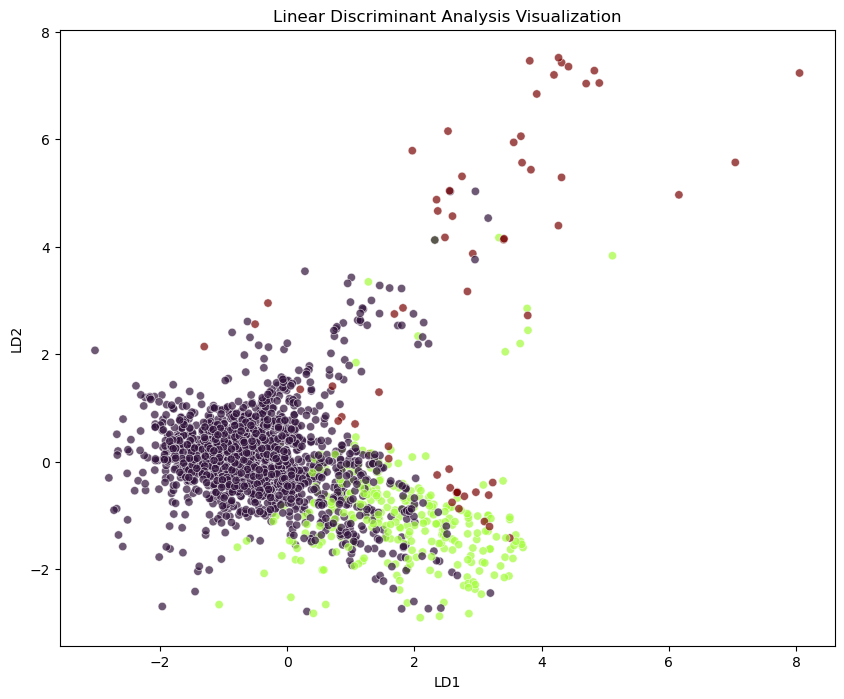

In [72]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = X_lda[:,0], y = X_lda[:,1], c = Y, cmap='turbo', alpha=0.7, edgecolors='black')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Linear Discriminant Analysis Visualization')
plt.show()

### Results and Model Comparison

In [ ]:
summary = pd.DataFrame({"Model": ["Logistic Regression",
                        "KNN",
                        "Random Forest"],
                        "Score": [log_reg_model.score(X_train, Y_train),
                                  knn_model.score(X_train, Y_train),
                                  rf_model.score(X_train, Y_train)]})
summary_df = summary.sort_values(by="Score", ascending=False)
summary_df = summary_df.set_index("Score")
summary_df.head(5)

From the above table, we can see that Random Forest with 0.998 score is the best performer among models. And, Logistic Regression has the lowest score 0.915.

#### Distribution of Fetal Health (Data Imbalance)

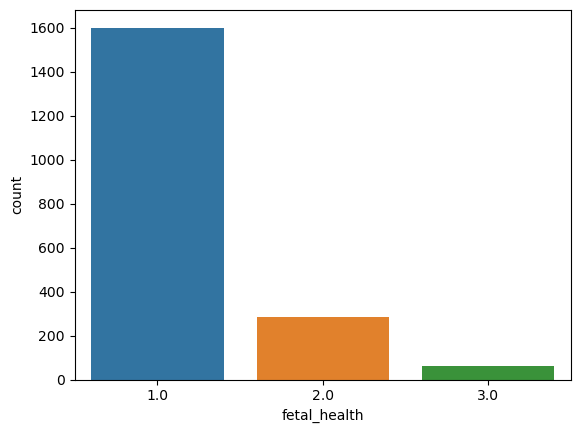

In [74]:
sns.countplot(x="fetal_health",data = df)
plt.show()

As we can see from the above graph, 'fetal_health' feature is clearly imbalanced. Hence, we can use Up Sampling as our strategy to balance the data.

In RandomOverSampler or Up Sampling, we do sampling with replacement, which means we do random sampling in minority class, until it has the same number of instances as majority class. So the instances in minority class will appear multiple times.

In [75]:
cols = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

scale_X = StandardScaler()
X = pd.DataFrame(scale_X.fit_transform(df.drop(["fetal_health"],axis = 1)), columns = cols)
Y = df["fetal_health"]

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [77]:
up_sampling = RandomOverSampler()
X_train_up_sampling, Y_train_up_sampling = up_sampling.fit_resample(X_train, Y_train)

<Axes: >

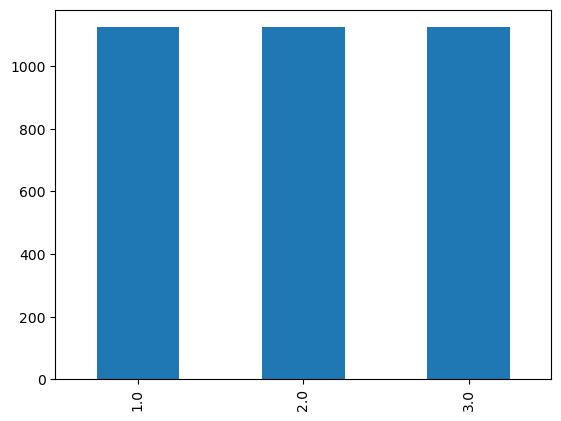

In [78]:
Y_train_up_sampling.value_counts().plot.bar()

In [ ]:
#Checking KNN score after upsampling
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train_up_sampling, Y_train_up_sampling)
print(f"K-Nearest Neighbors score: {knn_model.score(X_train_up_sampling, Y_train_up_sampling)}")

In [80]:
#Checking RandomForest score after upsampling
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_up_sampling, Y_train_up_sampling)
print(f"Random Forest Score: {rf_model.score(X_train_up_sampling, Y_train_up_sampling)}")

Random Forest Score: 0.9997037037037036


In [81]:
#Checking Logistic Regresssion after upsampling
lr = LogisticRegression()
log_reg_model = lr.fit(X_train_up_sampling, Y_train_up_sampling)
print(f"Logistic Regression Score: {log_reg_model.score(X_train_up_sampling, Y_train_up_sampling)}")

Logistic Regression Score: 0.9339259259259259


c:\Users\HP\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
summary = pd.DataFrame({"Model": ["Logistic Regression",
                        "KNN",
                        "Random Forest"],
                        "Score": [log_reg_model.score(X_train_up_sampling, Y_train_up_sampling),
                                  knn_model.score(X_train_up_sampling, Y_train_up_sampling),
                                  rf_model.score(X_train_up_sampling, Y_train_up_sampling)]})
summary_df = summary.sort_values(by="Score", ascending=False)
summary_df = summary_df.set_index("Score")
summary_df.head(5)

After up-sampling the Fetal Health predictor column, which is imbalanced before the Random Forest is still the best performer, that being said KNN and Logistic Regression accuracy score increased to 7% and 2% respectively.

### ROC Curve:
Reciever Operating Curve(ROC) metric evaluates the output quality of predictor or classifier from a model via graphical plot -- which reflects the sensitivity of the model.




Below is the ROC for multi-class classifier using One Vs. Rest approach from the best performer i.e., Random Forest

In [83]:
from sklearn import metrics
import seaborn as sns

In [84]:
rf_model, pred_rf

(RandomForestClassifier(),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2.,
        1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 3., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 3., 1., 1., 1.,
        1., 1., 2., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
        1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 3., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
        2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 3.,
        1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1

In [85]:
y_proba = rf_model.predict_proba(X_test)

In [86]:
classes = rf_model.classes_
classes

array([1., 2., 3.])

In [87]:
! pip install --upgrade seaborn

^C


In [88]:
print(sns.__version__)

0.12.2


In [89]:
def calculate_tpr_fpr(Y_test, pred_rf):
   
    cm = confusion_matrix(Y_test, pred_rf)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    tpr =  TP/(TP + FN) # sensitivity 
    fpr = 1 - TN/(TN+FP) # specificity 
    
    return tpr, fpr


In [90]:
def get_all_roc_coordinates(Y_test, y_proba):

    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        pred_rf = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(Y_test, pred_rf)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [93]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

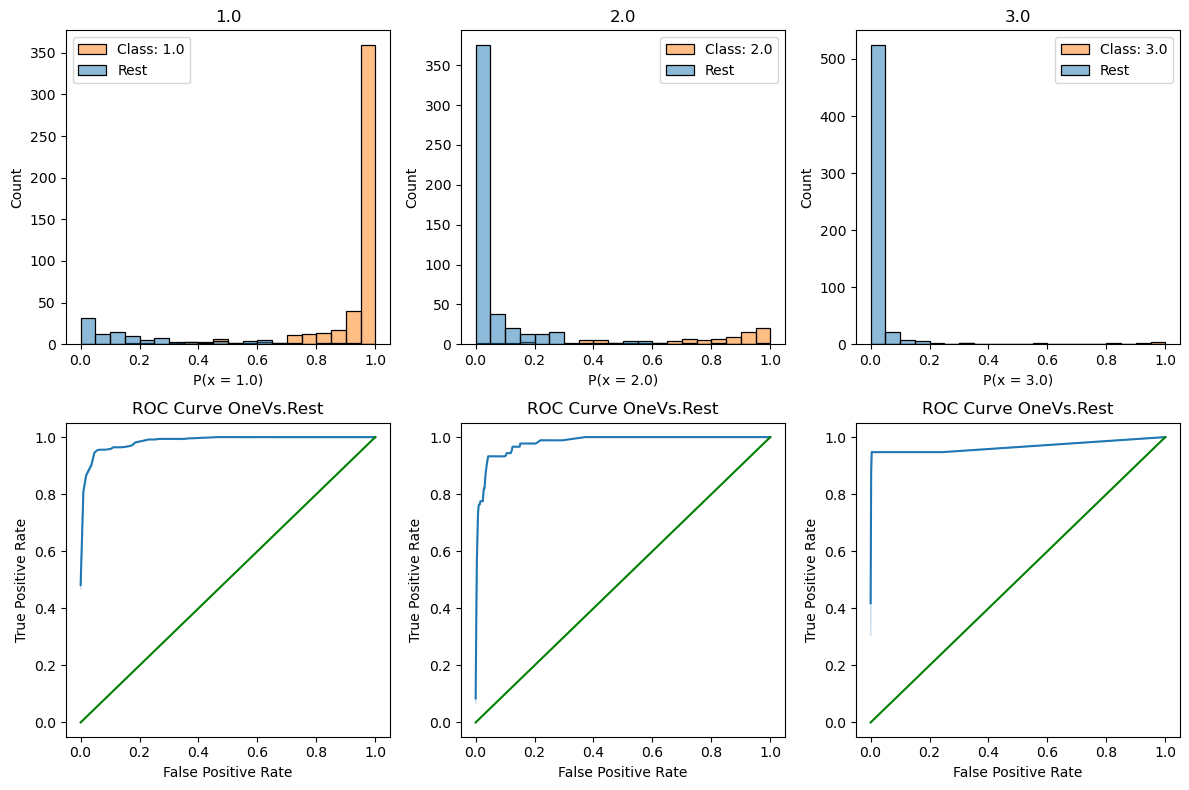

In [94]:
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()  # Creating an auxilary dataframe for plots
    df_aux['class'] = [1 if y == c else 0 for y in Y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    ax_bottom = plt.subplot(2, 3, i+4)  # Determining roc coordinates and plotting the roc curve
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OneVs.Rest")
    
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

Calculating the ROC AUC(Area Under Curve) for each classes in predictor:

In [95]:
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OneVs.Rest: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OneVs.Rest: {avg_roc_auc/i:.4f}")

1.0 ROC AUC OneVs.Rest: 0.9866
2.0 ROC AUC OneVs.Rest: 0.9808
3.0 ROC AUC OneVs.Rest: 0.9670
average ROC AUC OneVs.Rest: 0.9781


The total unweighted mean comparision shown below:

In [96]:
roc_auc_score(Y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro')

0.9781129668493835

### Constraints & Future Work

There were no major constraints I came across while implementing these models. I believe this is due to the fact that the data was already pre-processed, which essentially means it was ready to be fit into models. There were also no null or missing values in the data. However, this is not always the case as many datasets in the real work usually have missing values and need to be pre-processed.



For future work, there are other classification models I could pass the data through. These models include decision trees and Naive Bayes for multi-class classification. We could also continue to use hyper parameter tuning for some of the other models to fully optimize for each model.

### Conclusion

After running each model, I observed that the Random Forest is the best performer regardless of data imbalancing. It performed the best by yielding an accuracy of 97 percent at roc_auc score. Upon implementing hyper parameter tuning, I saw that it performed slightly better. However, I did hyperparameter tuning for other models but the parameters doesn't show more importance as it may not significantly improve results due to the accuracy already being so high.



Preparing the models for training was an important aspect I learned from this project with careful observation of overfitting. Nearly every attribute was needed to prepare the models with the exception of "subject" element. Although this was ideal for us, we know that it will not always be true. I saw firsthand the importance of attention to detail as not dropping the appropriate attributes will often hinder performance.